# Online Ads Purchases Regression Model
### Deval Parikh

# Loading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [364]:
df = pd.read_csv('./Social_Network_Ads.csv')

In [365]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Checking for Null Values and Changing Data Types to Clean the Data

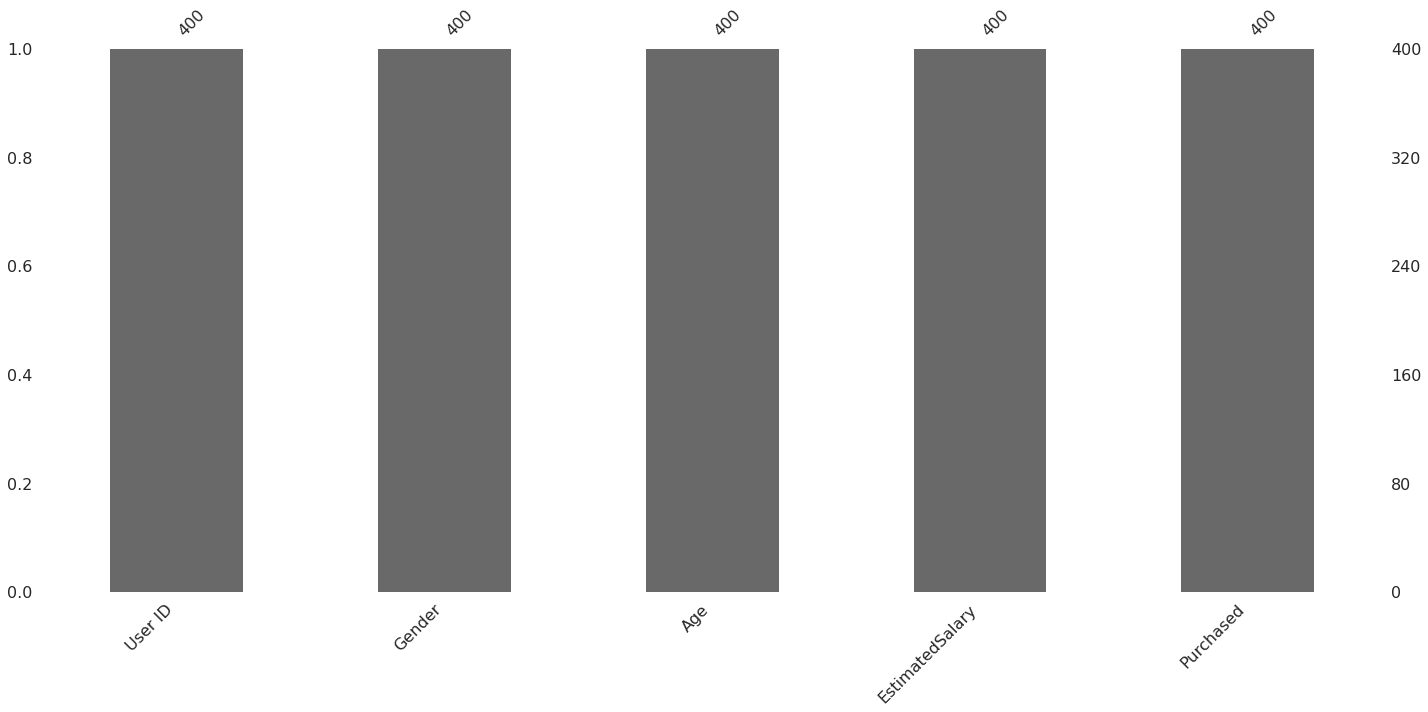

In [367]:
msno.bar(df)

In [368]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)

df = pd.concat([df, Gender], axis=1)

In [369]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [370]:
df['Male'] = df['Male'].astype(float)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    int64  
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    int64  
 5   Male             400 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 18.9+ KB


# Graphical Plots to analyze relation of variables in Dataset

## Gender Relation

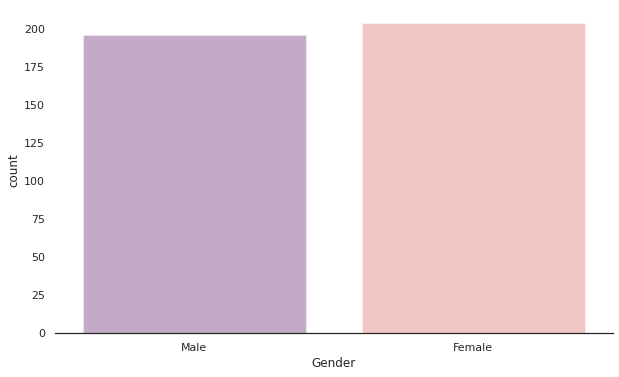

In [372]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df, palette='magma', alpha=0.4)
sns.despine(left=True)

## Salary Relation

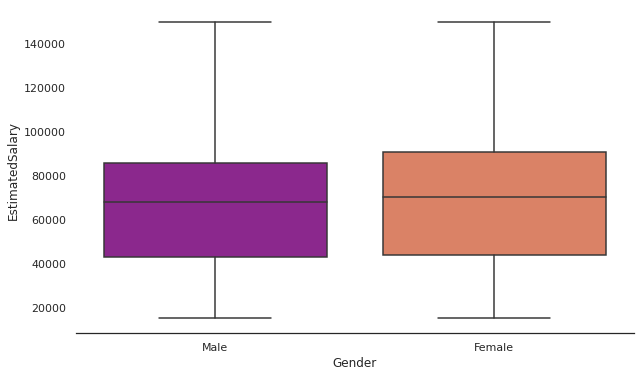

In [373]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df, palette='plasma')
sns.despine(left=True)

## Plot of Estimated Salary and Age Features

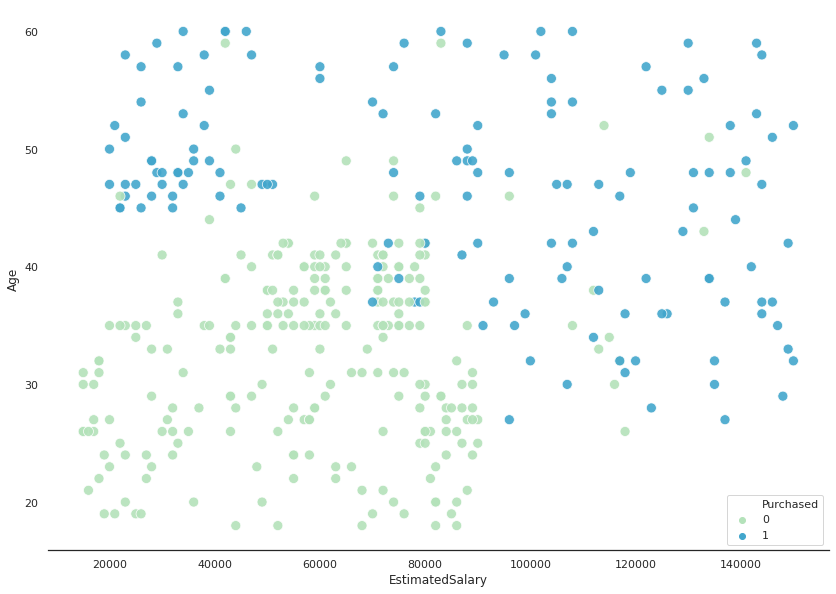

In [374]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='EstimatedSalary', y='Age', data=df, hue=df['Purchased'], palette='GnBu', s=100, alpha=0.9)
sns.despine(left=True)

We observe that people with age 30 and above plus salary of 80,000 and above tend to purhase more from Online advertisements

Text(0, 0.5, 'Gender')

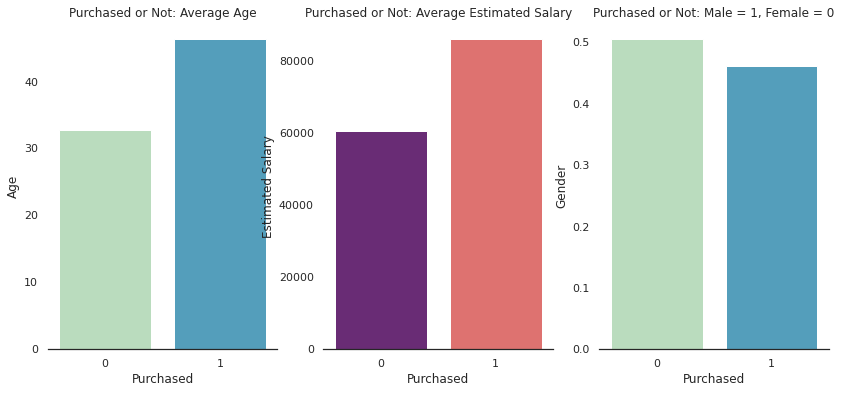

In [375]:
df_purc = df.groupby(df['Purchased']).mean()
df_purc = df_purc.reset_index()
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
w = sns.barplot(x='Purchased', y= 'Age', data=df_purc, palette='GnBu', ax=ax[0])
i = sns.barplot(x='Purchased', y= 'EstimatedSalary', data=df_purc, palette='magma', ax=ax[1])
h = sns.barplot(x='Purchased', y= 'Male', data=df_purc, palette='GnBu', ax=ax[2])
sns.despine(left=True)

w.set_title('Purchased or Not: Average Age')
w.set_ylabel('Age')

i.set_title('Purchased or Not: Average Estimated Salary')
i.set_ylabel('Estimated Salary')

h.set_title('Purchased or Not: Male = 1, Female = 0')
h.set_ylabel('Gender')


# Scaling the Data for Regression

In [376]:
X = df.drop(['User ID', 'Gender', 'Purchased'], axis=1)
y = df['Purchased']

In [377]:
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1.0
1,35,20000,1.0
2,26,43000,0.0
3,27,57000,0.0
4,19,76000,1.0


In [378]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [379]:
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)

In [380]:
scaled_data.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


# Logistic Regression

In [381]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=2)
fit=test.fit(X,y)
print(fit.scores_)

[4.51155226e+02 8.72013169e+05 3.67945562e-01]


In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(scaled_data,y, test_size=0.3)

In [383]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [384]:
prediction = logreg.predict(X_test)

# Evaluation
### of Logistic Regression

In [385]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        79
           1       0.76      0.71      0.73        41

    accuracy                           0.82       120
   macro avg       0.81      0.80      0.80       120
weighted avg       0.82      0.82      0.82       120



# K Nearest Neighbor
* We will now classify the same data with KNN Classifier
* First we will perform Elbow Method to find out the right value of K
* then we will run KNN Analysis on the Dataset
* Finally we will evaluate the Data

# Elbow Method
### Finding optimal K value for KNN

In [386]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_k = knn.predict(X_test)
    error_rate.append(np.mean(prediction_k !=y_test))

In [387]:
error_rate = pd.DataFrame(error_rate,range(1,16), columns=['Error Rate']).reset_index()
error_rate = error_rate.rename(columns={'index': 'K Value'})

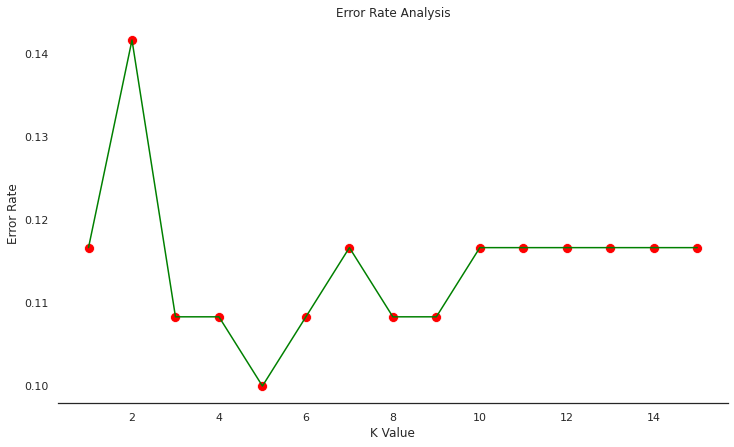

In [388]:
plt.figure(figsize=(12,7))
g = sns.set(style="white")
g = sns.lineplot(x='K Value', y='Error Rate', data=error_rate, color='green')
f = sns.scatterplot(x='K Value', y='Error Rate', data=error_rate, color='red', s=100)

g.set_title('Error Rate Analysis')
g.set_ylabel('Error Rate')
g.set_xlabel('K Value')
g =sns.despine(left=True)

* We will chose the K Value to be 3 because after that there is no significant drop in the error rate so this seems optimum

# K Nearest Neighbor Classification

* We have already scaled the data for Logistic regression
* We have already seperated train and test data before
* We will now directly proceed by running the model on the same data set


In [389]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
prediction_3 = knn.predict(X_test)

# Evaluation
### of KNN

In [390]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_k))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        79
           1       0.83      0.83      0.83        41

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120

